# CRISP-DM Methodology for UFC Fight Prediction

## 1. Business Understanding
   - Define the problem: Predict the winner of UFC fight.
   - Objectives: Create an ML model to predict winners accurately.
   - Success criteria: Achieve prediction accuracy above 70%.

## 2. Data Understanding
   - Gather data: Collect historical UFC fight data.
   - Explore data: Understand its structure, quality, and relationships.

## 3. Data Preparation
   - Preprocess data: Handle missing values, outliers, etc.
   - Feature engineering: Create or transform features for better performance.

## 4. Modeling
   - Select algorithms: Choose suitable ML algorithms.
   - Train-test split: Divide data into training and testing sets.
   - Model training: Train selected algorithms on training data.
   - Model evaluation: Assess model performance using various metrics.

## 5. Evaluation
   - Assess model performance: Compare models, tune hyperparameters.
   - Validate results: Validate model on testing data.

## 6. Deployment
   - Deploy the model: Integrate into a platform for predictions.
   - Monitor performance: Continuously monitor and update the model.

## 7. Iterative Improvement
   - Gather feedback: Collect user and stakeholder feedback.
   - Update the model: Incorporate feedback and new data.
   - Repeat the process: Iterate through the CRISP-DM process for improvements.


## CRISP-DM: 2. Data Understanding

### Import Python Libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#to ignore warnings
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler

###  Load the Dataset

In [2]:
data_file = 'DataUfc/data.csv'
df = pd.read_csv(data_file)

### Preview Data

In [3]:
df.shape

(6012, 144)

The dataset is 144 columns, and because of that we will need to tweek the pandas display options to be able to see all the columns.

In [4]:
pd.set_option("display.max_rows", None, "display.max_columns", None) 

###  Exploratory Data Analysis (EDA)

In [5]:
#Preview of dataset provided by kaggle
df.head()

,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,B_avg_KD,B_avg_opp_KD,B_avg_SIG_STR_pct,B_avg_opp_SIG_STR_pct,B_avg_TD_pct,B_avg_opp_TD_pct,B_avg_SUB_ATT,B_avg_opp_SUB_ATT,B_avg_REV,B_avg_opp_REV,B_avg_SIG_STR_att,B_avg_SIG_STR_landed,B_avg_opp_SIG_STR_att,B_avg_opp_SIG_STR_landed,B_avg_TOTAL_STR_att,B_avg_TOTAL_STR_landed,B_avg_opp_TOTAL_STR_att,B_avg_opp_TOTAL_STR_landed,B_avg_TD_att,B_avg_TD_landed,B_avg_opp_TD_att,B_avg_opp_TD_landed,B_avg_HEAD_att,B_avg_HEAD_landed,B_avg_opp_HEAD_att,B_avg_opp_HEAD_landed,B_avg_BODY_att,B_avg_BODY_landed,B_avg_opp_BODY_att,B_avg_opp_BODY_landed,B_avg_LEG_att,B_avg_LEG_landed,B_avg_opp_LEG_att,B_avg_opp_LEG_landed,B_avg_DISTANCE_att,B_avg_DISTANCE_landed,B_avg_opp_DISTANCE_att,B_avg_opp_DISTANCE_landed,B_avg_CLINCH_att,B_avg_CLINCH_landed,B_avg_opp_CLINCH_att,B_avg_opp_CLINCH_landed,B_avg_GROUND_att,B_avg_GROUND_landed,B_avg_opp_GROUND_att,B_avg_opp_GROUND_landed,B_avg_CTRL_time(seconds),B_avg_opp_CTRL_time(seconds),B_total_time_fought(seconds),B_total_rounds_fought,B_total_title_bouts,B_current_win_streak,B_current_lose_streak,B_longest_win_streak,B_wins,B_losses,B_draw,B_win_by_Decision_Majority,B_win_by_Decision_Split,B_win_by_Decision_Unanimous,B_win_by_KO/TKO,B_win_by_Submission,B_win_by_TKO_Doctor_Stoppage,B_Stance,B_Height_cms,B_Reach_cms,B_Weight_lbs,R_avg_KD,R_avg_opp_KD,R_avg_SIG_STR_pct,R_avg_opp_SIG_STR_pct,R_avg_TD_pct,R_avg_opp_TD_pct,R_avg_SUB_ATT,R_avg_opp_SUB_ATT,R_avg_REV,R_avg_opp_REV,R_avg_SIG_STR_att,R_avg_SIG_STR_landed,R_avg_opp_SIG_STR_att,R_avg_opp_SIG_STR_landed,R_avg_TOTAL_STR_att,R_avg_TOTAL_STR_landed,R_avg_opp_TOTAL_STR_att,R_avg_opp_TOTAL_STR_landed,R_avg_TD_att,R_avg_TD_landed,R_avg_opp_TD_att,R_avg_opp_TD_landed,R_avg_HEAD_att,R_avg_HEAD_landed,R_avg_opp_HEAD_att,R_avg_opp_HEAD_landed,R_avg_BODY_att,R_avg_BODY_landed,R_avg_opp_BODY_att,R_avg_opp_BODY_landed,R_avg_LEG_att,R_avg_LEG_landed,R_avg_opp_LEG_att,R_avg_opp_LEG_landed,R_avg_DISTANCE_att,R_avg_DISTANCE_landed,R_avg_opp_DISTANCE_att,R_avg_opp_DISTANCE_landed,R_avg_CLINCH_att,R_avg_CLINCH_landed,R_avg_opp_CLINCH_att,R_avg_opp_CLINCH_landed,R_avg_GROUND_att,R_avg_GROUND_landed,R_avg_opp_GROUND_att,R_avg_opp_GROUND_landed,R_avg_CTRL_time(seconds),R_avg_opp_CTRL_time(seconds),R_total_time_fought(seconds),R_total_rounds_fought,R_total_title_bouts,R_current_win_streak,R_current_lose_streak,R_longest_win_streak,R_wins,R_losses,R_draw,R_win_by_Decision_Majority,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
0,Adrian Yanez,Gustavo Lopez,Chris Tognoni,2021-03-20,"Las Vegas, Nevada, USA",Red,False,Bantamweight,0.000,0.0,0.420000,0.49500,0.330,0.36000,0.500,1.0000,0.00,0.0,50.0000,20.0000,84.000,45.0000,76.5000,41.000,114.000,64.00,1.500,1.0,9.0,6.500,39.500,11.000,63.0000,27.500,7.5000,7.0000,12.0000,9.0000,3.000,2.000,9.000,8.500,35.0000,12.5,43.5000,17.5000,10.5000,4.5000,4.0000,3.00,4.5000,3.000,36.50,24.50,34.00,277.5000,531.5,4,0,0,1,1,1,1,0,0,0,0,0,1,0,Orthodox,165.10,170.18,135.0,1.000000,0.000000,0.500000,0.460000,0.000000,0.00000,0.000000,0.00000,0.00000,0.00,34.000000,17.000000,13.00000,6.000000,35.000000,18.000000,16.000000,9.000000,0.000000,0.000000,3.000000,0.000000,32.00000,15.000000,11.000000,5.000000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,33.000000,16.000000,12.000000,6.000000,1.000000,1.000000,1.0000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,54.000000,166.000000,1,0,1,0,1,1,0,0,0,0,0,1,0,0,Orthodox,170.18,177.80,135.0,31.0,27.0
1,Trevin Giles,Roman Dolidze,Herb Dean,2021-03-20,"Las Vegas, Nevada, USA",Red,False,Middleweight,0.500,0.0,0.660000,0.30500,0.300,0.50000,1.500,0.0000,0.00,0.0,65.5000,35.0000,50.000,16.5000,113.5000,68.500,68.500,29.00,2.500,1.5,0.5,0.500,46.000,20.000,36.0000,7.500,12.0000,8.0000,8.0000,3.0000,7.500,7.000,6.000,6.000,58.0000,30.0,48.0000,15.5000,0.5000,0.5000,0.5000,0.50,7

Every row is a compilation of info about each fighter up until that fight. 

In [6]:
#Check datatypes by using info() 
# This method prints information about a DataFrame including the index dtype and columns, non-null values and memory usage.
df.info(max_cols=200)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6012 entries, 0 to 6011
Data columns (total 144 columns):
 #    Column                        Non-Null Count  Dtype  
---   ------                        --------------  -----  
 0    R_fighter                     6012 non-null   object 
 1    B_fighter                     6012 non-null   object 
 2    Referee                       5980 non-null   object 
 3    date                          6012 non-null   object 
 4    location                      6012 non-null   object 
 5    Winner                        6012 non-null   object 
 6    title_bout                    6012 non-null   bool   
 7    weight_class                  6012 non-null   object 
 8    B_avg_KD                      4585 non-null   float64
 9    B_avg_opp_KD                  4585 non-null   float64
 10   B_avg_SIG_STR_pct             4585 non-null   float64
 11   B_avg_opp_SIG_STR_pct         4585 non-null   float64
 12   B_avg_TD_pct                  4585 non-null   

#### Summary Statistics for Numerical Columns:

In [7]:
#Calculate summary statistics for numerical columns (mean, median, standard deviation, etc.).
df.describe(include = 'all')

,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,B_avg_KD,B_avg_opp_KD,B_avg_SIG_STR_pct,B_avg_opp_SIG_STR_pct,B_avg_TD_pct,B_avg_opp_TD_pct,B_avg_SUB_ATT,B_avg_opp_SUB_ATT,B_avg_REV,B_avg_opp_REV,B_avg_SIG_STR_att,B_avg_SIG_STR_landed,B_avg_opp_SIG_STR_att,B_avg_opp_SIG_STR_landed,B_avg_TOTAL_STR_att,B_avg_TOTAL_STR_landed,B_avg_opp_TOTAL_STR_att,B_avg_opp_TOTAL_STR_landed,B_avg_TD_att,B_avg_TD_landed,B_avg_opp_TD_att,B_avg_opp_TD_landed,B_avg_HEAD_att,B_avg_HEAD_landed,B_avg_opp_HEAD_att,B_avg_opp_HEAD_landed,B_avg_BODY_att,B_avg_BODY_landed,B_avg_opp_BODY_att,B_avg_opp_BODY_landed,B_avg_LEG_att,B_avg_LEG_landed,B_avg_opp_LEG_att,B_avg_opp_LEG_landed,B_avg_DISTANCE_att,B_avg_DISTANCE_landed,B_avg_opp_DISTANCE_att,B_avg_opp_DISTANCE_landed,B_avg_CLINCH_att,B_avg_CLINCH_landed,B_avg_opp_CLINCH_att,B_avg_opp_CLINCH_landed,B_avg_GROUND_att,B_avg_GROUND_landed,B_avg_opp_GROUND_att,B_avg_opp_GROUND_landed,B_avg_CTRL_time(seconds),B_avg_opp_CTRL_time(seconds),B_total_time_fought(seconds),B_total_rounds_fought,B_total_title_bouts,B_current_win_streak,B_current_lose_streak,B_longest_win_streak,B_wins,B_losses,B_draw,B_win_by_Decision_Majority,B_win_by_Decision_Split,B_win_by_Decision_Unanimous,B_win_by_KO/TKO,B_win_by_Submission,B_win_by_TKO_Doctor_Stoppage,B_Stance,B_Height_cms,B_Reach_cms,B_Weight_lbs,R_avg_KD,R_avg_opp_KD,R_avg_SIG_STR_pct,R_avg_opp_SIG_STR_pct,R_avg_TD_pct,R_avg_opp_TD_pct,R_avg_SUB_ATT,R_avg_opp_SUB_ATT,R_avg_REV,R_avg_opp_REV,R_avg_SIG_STR_att,R_avg_SIG_STR_landed,R_avg_opp_SIG_STR_att,R_avg_opp_SIG_STR_landed,R_avg_TOTAL_STR_att,R_avg_TOTAL_STR_landed,R_avg_opp_TOTAL_STR_att,R_avg_opp_TOTAL_STR_landed,R_avg_TD_att,R_avg_TD_landed,R_avg_opp_TD_att,R_avg_opp_TD_landed,R_avg_HEAD_att,R_avg_HEAD_landed,R_avg_opp_HEAD_att,R_avg_opp_HEAD_landed,R_avg_BODY_att,R_avg_BODY_landed,R_avg_opp_BODY_att,R_avg_opp_BODY_landed,R_avg_LEG_att,R_avg_LEG_landed,R_avg_opp_LEG_att,R_avg_opp_LEG_landed,R_avg_DISTANCE_att,R_avg_DISTANCE_landed,R_avg_opp_DISTANCE_att,R_avg_opp_DISTANCE_landed,R_avg_CLINCH_att,R_avg_CLINCH_landed,R_avg_opp_CLINCH_att,R_avg_opp_CLINCH_landed,R_avg_GROUND_att,R_avg_GROUND_landed,R_avg_opp_GROUND_att,R_avg_opp_GROUND_landed,R_avg_CTRL_time(seconds),R_avg_opp_CTRL_time(seconds),R_total_time_fought(seconds),R_total_rounds_fought,R_total_title_bouts,R_current_win_streak,R_current_lose_streak,R_longest_win_streak,R_wins,R_losses,R_draw,R_win_by_Decision_Majority,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
count,6012,6012,5980,6012,6012,6012,6012,6012,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.00000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,6012.000000,6012.000000,6012.000000,6012.000000,6012.000000,6012.000000,6012.000000,6012.0,6012.000000,6012.000000,6012.000000,6012.000000,6012.000000,6012.000000,5946,6002.000000,5121.000000,6004.000000,5300.000000,5300.000000,5300.000000,5300.000000,5300.000000,5300.000000,5300.000000,5300.000000,5300.000000,5300.000000,5300.000000,5300.000000,5300.000000,5300.000000,5300.000000,5300.000000,5300.000000,5300.000000,5300.000000,5300.000000,5300.000000,5300.000000,5300.000000,5300.000000,5300.000000,5300.000000,5300.000000,5300.000000,5300.000000,5300.000000,5300.000000,5300.000000,5300.000000,5300.000000,5300.000000,5300.000000,5300.000000,5300.000000,5300.000000,5300.000000,5300.000000,5300.000000,5300.000000,5300.000000,5300.00000,

### Column definitions:

```markdown
- **R_ and B_ Prefix**: Signifies red and blue corner fighter stats respectively.
- **_opp_ Columns**: Contain the average of damage done by the opponent on the fighter.
- **KD**: Number of knockdowns.
- **SIG_STR**: Number of significant strikes landed of attempted.
- **SIG_STR_pct**: Significant strikes percentage.
- **TOTAL_STR**: Total strikes landed of attempted.
- **TD**: Number of takedowns.
- **TD_pct**: Takedown percentages.
- **SUB_ATT**: Number of submission attempts.
- **PASS**: Number of times the guard was passed.
- **REV**: Number of reversals landed.
- **HEAD**: Number of significant strikes to the head landed of attempted.
- **BODY**: Number of significant strikes to the body landed of attempted.
- **CLINCH**: Number of significant strikes in the clinch landed of attempted.
- **GROUND**: Number of significant strikes on the ground landed of attempted.
- **win_by**: Method of win.
- **last_round**: Last round of the fight (e.g., if it was a KO in 1st, then this will be 1).
- **last_round_time**: When the fight ended in the last round.
- **Format**: Format of the fight (3 rounds, 5 rounds, etc.).
- **Referee**: Name of the referee.
- **Date**: Date of the fight.
- **Location**: Location in which the event took place.
- **Fight_type**: Weight class and whether it's a title bout or not.
- **Winner**: Winner of the fight.
- **Stance**: Stance of the fighter (orthodox, southpaw, etc.).
- **Height_cms**: Height in centimeters.
- **Reach_cms**: Reach of the fighter (arm span) in centimeters.
- **Weight_lbs**: Weight of the fighter in pounds (lbs).
- **Age**: Age of the fighter.
- **title_bout**: Boolean value of whether it is a title fight or not.
- **weight_class**: Weight class the fight is in (Bantamweight, Heavyweight, Women's Flyweight, etc.).
- **no_of_rounds**: Number of rounds the fight was scheduled for.
- **current_lose_streak**: Count of current concurrent losses of the fighter.
- **current_win_streak**: Count of current concurrent wins of the fighter.
- **draw**: Number of draws in the fighter's UFC career.
- **wins**: Number of wins in the fighter's UFC career.
- **losses**: Number of losses in the fighter's UFC career.
- **total_rounds_fought**: Average of total rounds fought by the fighter.
- **total_time_fought (seconds)**: Count of total time spent fighting in seconds.
- **total_title_bouts**: Total number of title bouts taken part in by the fighter.
- **win_by_Decision_Majority**: Number of wins by majority judges decision in the fighter's UFC career.
- **win_by_Decision_Split**: Number of wins by split judges decision in the fighter's UFC career.
- **win_by_Decision_Unanimous**: Number of wins by unanimous judges decision in the fighter's UFC career.
- **win_by_KO/TKO**: Number of wins by knockout in the fighter's UFC career.
- **win_by_Submission**: Number of wins by submission in the fighter's UFC career.
- **win_by_TKO_Doctor_Stoppage**: Number of wins by doctor stoppage in the fighter's UFC career.
```

In [8]:
# The below code shows null values present in the data in column-wise
df.isnull().sum()

R_fighter                          0
B_fighter                          0
Referee                           32
date                               0
location                           0
Winner                             0
title_bout                         0
weight_class                       0
B_avg_KD                        1427
B_avg_opp_KD                    1427
B_avg_SIG_STR_pct               1427
B_avg_opp_SIG_STR_pct           1427
B_avg_TD_pct                    1427
B_avg_opp_TD_pct                1427
B_avg_SUB_ATT                   1427
B_avg_opp_SUB_ATT               1427
B_avg_REV                       1427
B_avg_opp_REV                   1427
B_avg_SIG_STR_att               1427
B_avg_SIG_STR_landed            1427
B_avg_opp_SIG_STR_att           1427
B_avg_opp_SIG_STR_landed        1427
B_avg_TOTAL_STR_att             1427
B_avg_TOTAL_STR_landed          1427
B_avg_opp_TOTAL_STR_att         1427
B_avg_opp_TOTAL_STR_landed      1427
B_avg_TD_att                    1427
B

### Data Categories
* Numerical Columns: Many numerical columns such as those related to average statistics (e.g., average knockdowns, significant strike percentages, takedown percentages, etc.) have a substantial number of missing values (1427 missing values). This suggests that there may be instances where this statistical information was not recorded for certain fights or fighters.
* Categorical Columns: Categorical columns like 'Stance' for both red and blue fighters also have missing values, albeit fewer compared to the numerical columns. Similarly, the 'Referee' column has 32 missing values.
* Physical Attributes: Columns related to physical attributes like height, reach, and weight also have missing values. For example, 'B_Reach_cms' has 891 missing values, 'R_Reach_cms' has 406 missing values, 'B_Height_cms' has 10 missing values, and 'R_Height_cms' has 4 missing values. The number of missing values in these columns is relatively smaller compared to the numerical columns.
* Age: Both 'B_age' and 'R_age' columns have missing values (172 and 63 missing values respectively), indicating that the age of some fighters is not recorded in the dataset.
* Winner: It's noteworthy that the 'Winner' column has no missing values, indicating that the outcome of each fight is known.

#### Distribution of Null Values 

In [9]:
#This code will iterate over all columns in the DataFrame, 
# and if a column starts with 'B_', it will add the column name to the list B_fighters_columns.
B_fighters_columns = []
for column in df.columns:
        if column.startswith('B_'):
            B_fighters_columns.append(column)

In [10]:
#Same code but for R_fighters.
R_fighters_columns = []
for column in df.columns:
        if column.startswith('R_'):
            R_fighters_columns.append(column)

In [11]:
#function null_values_vis_bar_plot takes four parameters: df, columns_list, color, and title. 
#It generates a bar plot to visualize the count of null (NaN) values in columns 
# of a DataFrame specified in the columns_list.
def null_values_vis_bar_plot(df, columns_list, color, title):
    null_values = {}

    for column in columns_list:
        if df[column].isnull().sum()!=0:
            null_values[column] = df[column].isnull().sum()

    # Create bar plot for null counts in columns starting with 'B'
    plt.figure(figsize=(18,8))
    plt.bar(null_values.keys(), null_values.values(), color=color)
    plt.xlabel('Columns')
    plt.ylabel('Count of Null Values')
    plt.title(f'{title}')

    plt.xticks(rotation=90)  # Rotate x-axis tick labels vertically

    plt.show()

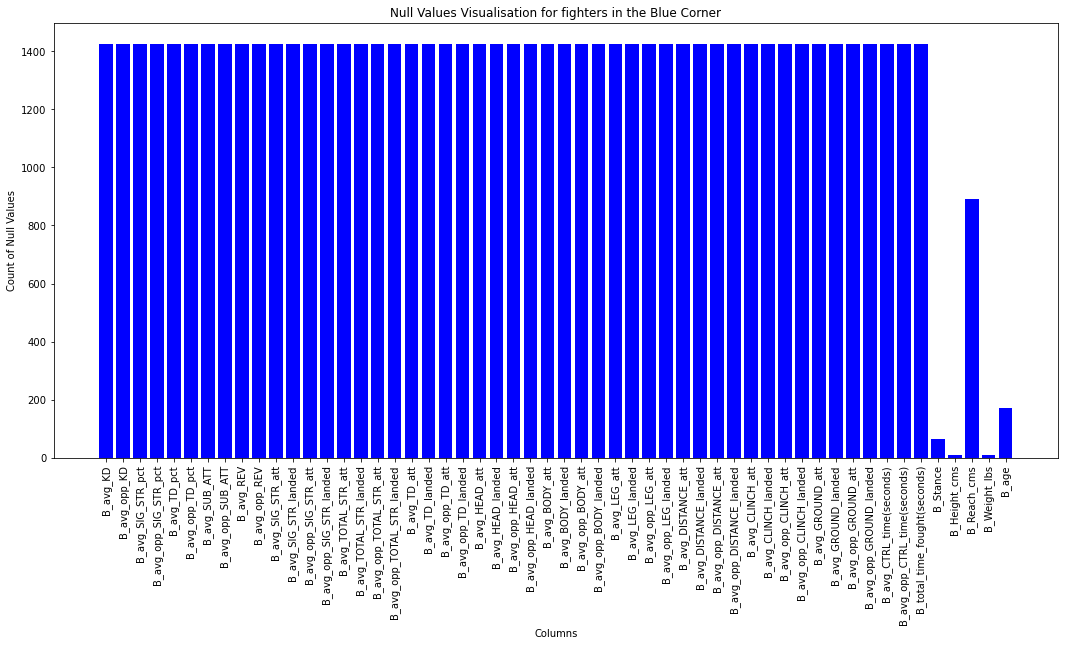

In [12]:
null_values_vis_bar_plot(df, B_fighters_columns, 'blue', "Null Values Visualisation for fighters in the Blue Corner")

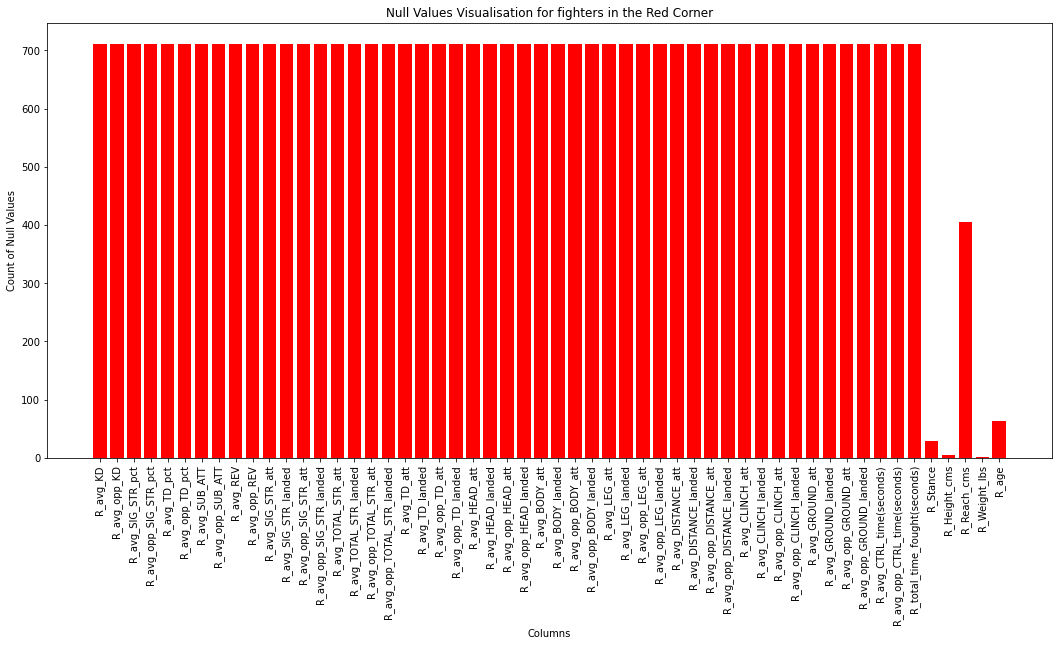

In [13]:
null_values_vis_bar_plot(df, R_fighters_columns, 'red', "Null Values Visualisation for fighters in the Red Corner")

In [14]:
#Checking null values in columns that doesn't related to the fighters (exclude R_ and B_ letter in the begining of the columns)
for column in df.columns:
        if df[column].isnull().sum()!=0 and not column.startswith('R_') and not column.startswith('B_'):
            print(f"Nan in {column}: {df[column].isnull().sum()}")

Nan in Referee: 32


* As we can see above, Blue fighters have 1427 missing rows and Red fighters have 712.
* We can also notice that the only column that has missing values and does not related to any fighter is Referee column, which we don't really need for our further analysis and model, so we just simply drop it.
* My assumption is that they probably must not have had any UFC fights before, that's why their stats data are missing. Let's check it.

In [21]:
# Filter the DataFrame to include only rows with null values in columns that start with 'B_'
df_null = df[df.filter(like='B_').isnull().any(axis=1)]

# Display the DataFrame
df_null.isnull().sum()

R_fighter                          0
B_fighter                          0
Referee                            8
date                               0
location                           0
Winner                             0
title_bout                         0
weight_class                       0
B_avg_KD                        1427
B_avg_opp_KD                    1427
B_avg_SIG_STR_pct               1427
B_avg_opp_SIG_STR_pct           1427
B_avg_TD_pct                    1427
B_avg_opp_TD_pct                1427
B_avg_SUB_ATT                   1427
B_avg_opp_SUB_ATT               1427
B_avg_REV                       1427
B_avg_opp_REV                   1427
B_avg_SIG_STR_att               1427
B_avg_SIG_STR_landed            1427
B_avg_opp_SIG_STR_att           1427
B_avg_opp_SIG_STR_landed        1427
B_avg_TOTAL_STR_att             1427
B_avg_TOTAL_STR_landed          1427
B_avg_opp_TOTAL_STR_att         1427
B_avg_opp_TOTAL_STR_landed      1427
B_avg_TD_att                    1427
B

* At first I wanted to create to separate DataFrames for B_fighters and for B_fighters, but as we can see above in the filtered DataFrame that has missing values and starts with 'B_' we have the exact amount of missing data in columns for R_fighters.
* So we have at least a 712 fights where average stats for both fighters are missing. 


In [48]:
#This function takes as input the fight_counts, which is a Series containing the count of fights for each fighter.
def miss_vals_by_numberOfFights(fight_counts, color):
    
    # Count the number of unique fight counts
    unique_fight_counts = fight_counts.value_counts().sort_index()

    # Visualize the distribution of fighters with missing values based on their fight counts
    plt.figure(figsize=(10, 6))
    plt.bar(unique_fight_counts.index, unique_fight_counts.values, color=color)
    plt.title('Distribution of Fighters with Missing Values by Number of Fights')
    plt.xlabel('Number of Fights')
    plt.ylabel('Number of Fighters')
    plt.xticks(unique_fight_counts.index)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

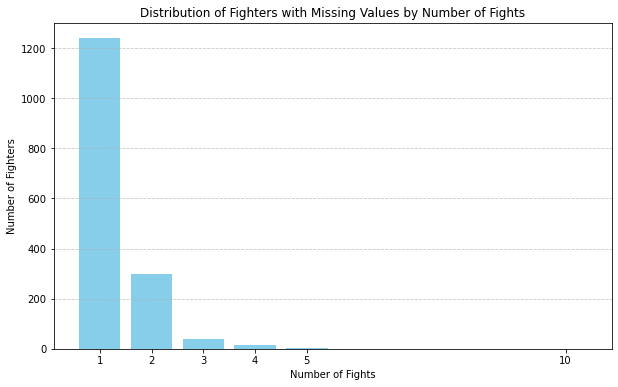

In [49]:
# Count the number of fights for each B_fighters in the dataset
B_fight_counts = df_null['B_fighter'].value_counts()

miss_vals_by_numberOfFights(B_fight_counts, 'skyblue')

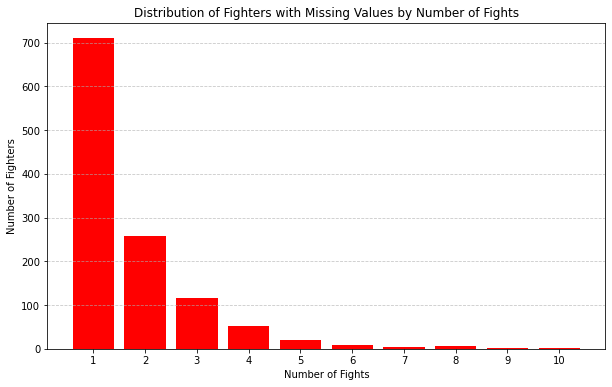

In [50]:
# Count the number of fights for each R_fighters in the dataset
R_fight_counts = df_null['R_fighter'].value_counts()

miss_vals_by_numberOfFights(R_fight_counts, 'red')

* Here we can see from the above, that my assumption was correct. 

 We now have a couple of options : 
       1) We can not delete them, since in total we got 6012 rows, and deleting 1/3(1427 + 712) of it will significantly reduces the size of our dataset, and since we know the outcome of each fight, deleting these rows would also mean that we are losing the data about freshmans. 
* Instead of deleting the missing rows, we can impute the missing values with sensible replacements. 
For numerical features, we will fill missing values with the mean, median, or mode of the respective feature. For categorical features, you might fill missing values with the most frequent category.

#### Visualisation of Relationships Between Variables:

In [45]:
# Create a DataFrame without null values
df_no_null = df.dropna()

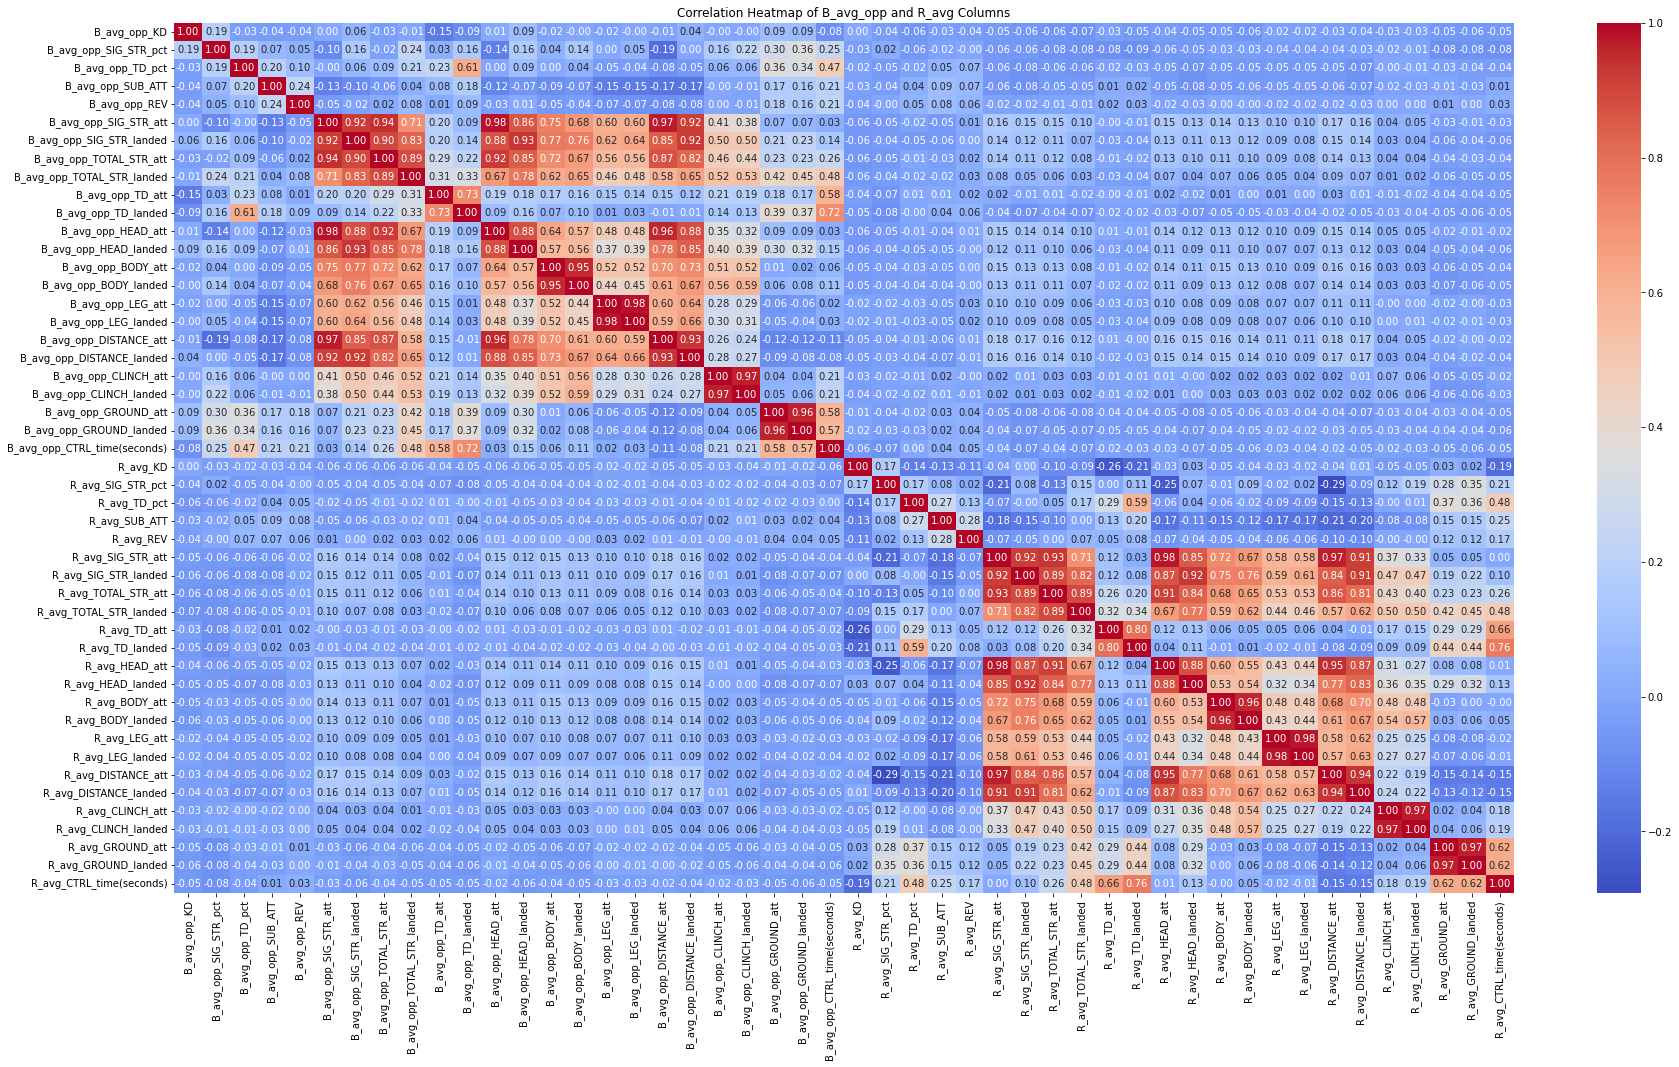

In [52]:
# Filter columns that start with 'B_avg_opp'
B_avg_opp_columns = [col for col in df_no_null.columns if col.startswith('B_avg_opp')]

# Filter columns that start with 'R_avg'
R_avg_columns = [col for col in df_no_null.columns if col.startswith('R_avg') and not col.startswith('R_avg_opp')]

# Concatenate the two lists of columns
selected_columns = B_avg_opp_columns + R_avg_columns

# Select the corresponding columns from the DataFrame
selected_df = df_no_null[selected_columns]

# Compute the correlation matrix
correlation_matrix = selected_df.corr()

# Plot the heatmap
plt.figure(figsize=(30, 16))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of B_avg_opp and R_avg Columns')
plt.show()


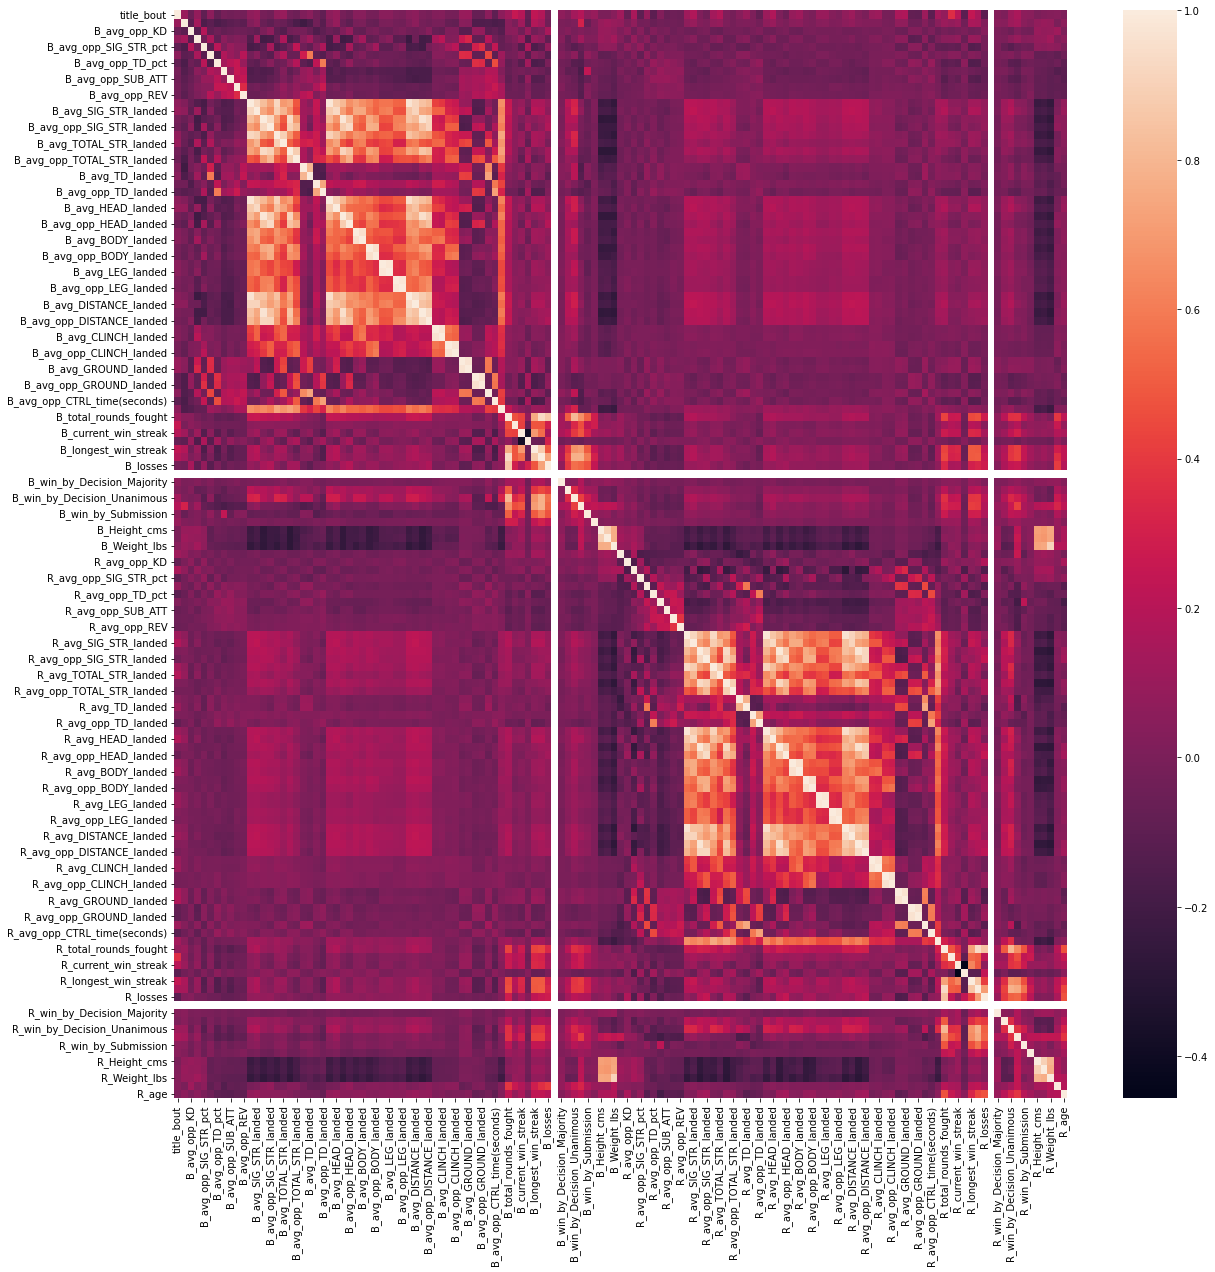

In [53]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr())

plt.show()

#### Target Variable "Winner" Distribution 

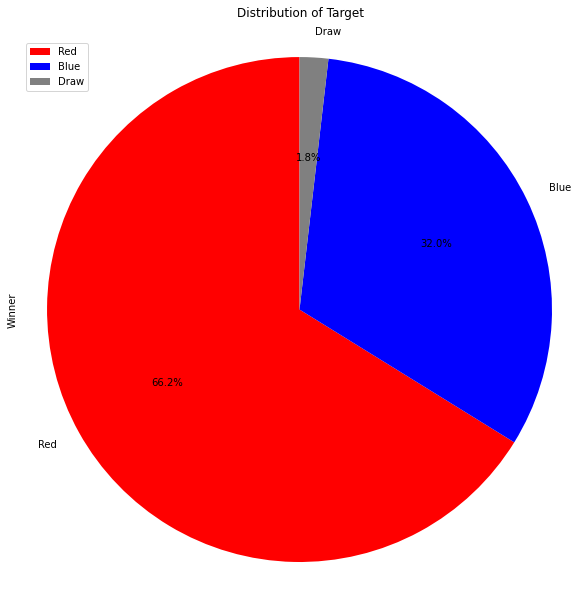

In [54]:
# Set the figure size
plt.figure(figsize=(10, 10))

#Define custom colors for each category 
colors = {'Blue': 'blue',
          'Red': 'red',
          'Draw': 'grey'}

# Plot pie chart
df['Winner'].value_counts().plot(kind='pie', 
                                 autopct='%1.1f%%', 
                                 startangle=90, 
                                 colors=[colors.get(label, 'green') for label in df['Winner'].unique()])
plt.title('Distribution of Target\n')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend()
plt.show()

We can see here that "Draws" are incredibly rare. Since the "Winner" variable is going to be our target, we are dealing with multi-class classification problem, but to simplify it, "Draws" should be removed from the target variable so it becomes a binary classification task.

### Ideas for Visualisation

With a dataset containing a wide range of features like the one you provided, there are several potential avenues for visualization and analysis. Here are a few ideas to get you started:

* Winner Distribution: Visualize the distribution of winners ('Winner' column). This can give insights into whether certain factors or fighter characteristics contribute to winning more often.
* Fighter Characteristics: Explore the distribution of various fighter characteristics such as height, weight, reach, age, and stance. You can visualize these distributions using histograms or box plots and compare them between winning and losing fighters.
* Fight Outcomes by Weight Class: Analyze the distribution of fight outcomes (win/loss) across different weight classes ('weight_class' column). This can reveal whether certain weight classes have higher win rates or are more competitive.
* Fight Statistics: Explore the average fight statistics (e.g., significant strikes, takedowns, knockdowns) for winning and losing fighters. Visualize these using histograms or box plots to identify differences in performance between winners and losers.
* Stance Analysis: Investigate the impact of fighter stance ('B_Stance' and 'R_Stance' columns) on fight outcomes. Compare the win rates and performance metrics of fighters with different stances.
* Title Bout Analysis: Analyze the frequency and outcomes of title bouts ('title_bout' column). Visualize the distribution of wins and losses in title bouts compared to non-title bouts.
* Correlation Analysis: Compute the correlation matrix between different numerical features in the dataset and visualize it using a heatmap. This can help identify relationships and dependencies between variables.
* Time Series Analysis: If the 'date' column contains temporal data, you can perform time series analysis to examine trends and patterns in fight outcomes or fighter characteristics over time.

### 4: Data Preprocessing:

### Dealing with NaNs

In [ ]:
# Returns the column names along with the number of NaN values in that particular column
for column in df.columns:
    if df[column].isnull().sum()!=0:
        print(f"Nan in {column}: {df[column].isnull().sum()}")



* Referee doesn't look like an important column. Let's delete that.
* Let's see if height and reach have a correlation
* The rest i.e. Age, Stance and Height, let's fill with the median of that column.
* We could replace the missing values with median/mode in the columns with fighters average stats, but it would affect on the data shape and 

#### Droping "Referee" column 

In [ ]:
df2 = df.copy()

In [ ]:
df2.drop(columns=['Referee'], inplace=True)

In [ ]:
df2.head()

Correlation between 'Height' and 'Reach'

In [ ]:
# Set style of scatterplot
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")

# Create scatterplot of dataframe
sns.lmplot('R_Height_cms', # Horizontal axis
           'R_Reach_cms', # Vertical axis
           data=df2, # Data source
           fit_reg=True # fix a regression line
           ) # S marker size

* We can see there is a positive correlation between height and reach. So we'll replace reach with height

In [ ]:
df2.isnull().sum()

In [ ]:
#Fills missing values in the Reach_cms column with Height_cms value
df2['R_Reach_cms'].fillna(df2['R_Height_cms'], inplace=True)
df2['B_Reach_cms'].fillna(df2['B_Height_cms'], inplace=True)

Filling 'Age', 'Stance' with the median of that column.

In [ ]:
df2['B_Stance'].value_counts()

In [ ]:
df2['R_Stance'].fillna('Orthodox', inplace=True)
df2['B_Stance'].fillna('Orthodox', inplace=True)

In [ ]:
for column in df2.columns:
    if df2[column].isnull().sum()!=0:
        print(f"Nan in {column}: {df2[column].isnull().sum()}")

In [ ]:
# Fill missing values with the median
df2['B_age'].fillna(df2['B_age'].median(), inplace=True)

In [ ]:
# After filling missing values
plt.figure(figsize=(8, 5))
sns.kdeplot(df2['B_age'], color='orange', label='After Filling Missing Values')
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('KDE Plot of B_age After Filling Missing Values')
plt.legend()
plt.show()

In [ ]:
#This line fills any remaining missing values in the df2 with the median of each column.
#df2.fillna(df2.median(), inplace=True)

### Removing non essential columns

In [ ]:
# Plot histograms for selected columns before imputation
plt.figure(figsize=(60, 70))
plt.subplots_adjust(hspace=0.5)
B_fighters_NULLcolumns = []
for column in B_fighters_columns:        
    if df[column].isnull().sum()!=0:
        B_fighters_NULLcolumns.append(column)
            
for i, column in enumerate(B_fighters_NULLcolumns):
    plt.subplot(9, 10, i+1)
    sns.histplot(df[column], kde=True, color='blue', bins=30)
    plt.title(f'{column} - Before Imputation')
    plt.xlabel('')
    plt.margins(x=0)  # Disable margins to allow zooming
plt.show()

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [ ]:
#Null columns list update 
B_fighters_NULLcolumns = []
for column in B_fighters_columns:        
    if df2[column].isnull().sum()!=0:
        B_fighters_NULLcolumns.append(column)

# Create a copy of the dataframe
df_imputed = df2.copy()

# Initialize the imputer
imputer = IterativeImputer(max_iter=10, random_state=0)

# Fit and transform the imputer on the selected columns
df_imputed[B_fighters_NULLcolumns] = imputer.fit_transform(df_imputed[B_fighters_NULLcolumns])

# Check if there are still any missing values
print("Number of missing values after imputation:")
print(df_imputed[B_fighters_NULLcolumns].isnull().sum())

In [ ]:
# Plot histograms for selected columns after imputation
plt.figure(figsize=(60, 70))
plt.subplots_adjust(hspace=0.5)

for i, column in enumerate(B_fighters_NULLcolumns):
    plt.subplot(9, 10, i+1)
    sns.histplot(df[column], kde=True, color='orange', bins=30)
    plt.title(f'{column} - After Imputation')
    plt.xlabel('')
    plt.margins(x=0)  # Disable margins to allow zooming
plt.show()